In [1]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, BatchNormalization, Flatten, MaxPooling2D, Lambda, ReLU
# from keras.initializers import RandomNormal
# from keras.regularizers import l2
import pandas as pd
import numpy as np
import cv2
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
df = pd.read_csv("cnn_data.csv")
df.labels = df.labels.astype('category')
lb = LabelBinarizer()
print(df.isnull().values.any())

b_size = 64
channels = 1
dim = 64

False


In [3]:
x_train, x_test, y_train, y_test = train_test_split(df.img_path, df.labels,
                                                    stratify=df.labels, test_size=0.1, random_state=2020)
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [4]:
x_train_img = np.empty(shape=(0,dim,dim,channels))
for row in x_train:
    frame = cv2.imread(row, 0)/255
    arr = np.reshape(frame, newshape=(1,dim,dim,channels))
    x_train_img = np.append(x_train_img, arr, axis=0)
    
x_test_img = np.empty(shape=(0,dim,dim,channels))
for row in x_test:
    frame = cv2.imread(row, 0)/255
    arr = np.reshape(frame, newshape=(1,dim,dim,channels))
    x_test_img = np.append(x_test_img, arr, axis=0)
    
print("Images Loaded")

Images Loaded


In [5]:
input_layer = Input(shape=(dim,dim,channels))
x = Conv2D(32, (3,3), padding="same")(input_layer)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(32, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D()(x)

x = Conv2D(64, (5,5), padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(64, (5,5), padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D()(x)

x = Conv2D(128, (5,5), padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(128, (5,5), padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D()(x)

x = Conv2D(256, (5,5), padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(256, (5,5), padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output = Dense(15, activation='softmax')(x)
    
# Connect the inputs with the outputs
cnn = Model(inputs=input_layer, outputs=output)

In [6]:
cnn.compile(loss="categorical_crossentropy",optimizer=Adam(lr=0.00006, decay=1e-6), metrics=['acc'])
cnn.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64, 64, 32)        0   

In [7]:
history = cnn.fit(x_train_img, y_train, batch_size=b_size, epochs=100, verbose=1,
                          validation_data=(x_test_img,y_test))

Train on 982 samples, validate on 110 samples
Epoch 1/100
982/982 [==============================] - 6s 6ms/step - loss: 1.3426 - acc: 0.6405 - val_loss: 2.7102 - val_acc: 0.0455
Epoch 2/100
982/982 [==============================] - 1s 1ms/step - loss: 0.2404 - acc: 0.9430 - val_loss: 2.7384 - val_acc: 0.0455
Epoch 3/100
982/982 [==============================] - 1s 1ms/step - loss: 0.0891 - acc: 0.9827 - val_loss: 2.7739 - val_acc: 0.0455
Epoch 4/100
982/982 [==============================] - 1s 1ms/step - loss: 0.0415 - acc: 0.9919 - val_loss: 2.8107 - val_acc: 0.0455
Epoch 5/100
982/982 [==============================] - 1s 1ms/step - loss: 0.0206 - acc: 1.0000 - val_loss: 2.9223 - val_acc: 0.0455
Epoch 6/100
982/982 [==============================] - 1s 1ms/step - loss: 0.0099 - acc: 1.0000 - val_loss: 3.0400 - val_acc: 0.0455
Epoch 7/100
982/982 [==============================] - 1s 1ms/step - loss: 0.0062 - acc: 1.0000 - val_loss: 3.1874 - val_acc: 0.0455
Epoch 8/100
982/982 [==

Epoch 61/100
982/982 [==============================] - 1s 1ms/step - loss: 1.4588e-04 - acc: 1.0000 - val_loss: 0.3686 - val_acc: 0.9273
Epoch 62/100
982/982 [==============================] - 1s 1ms/step - loss: 1.3762e-04 - acc: 1.0000 - val_loss: 0.3686 - val_acc: 0.9273
Epoch 63/100
982/982 [==============================] - 1s 1ms/step - loss: 2.4137e-04 - acc: 1.0000 - val_loss: 0.3757 - val_acc: 0.9273
Epoch 64/100
982/982 [==============================] - 1s 1ms/step - loss: 1.8693e-04 - acc: 1.0000 - val_loss: 0.4109 - val_acc: 0.9273
Epoch 65/100
982/982 [==============================] - 1s 1ms/step - loss: 2.7130e-04 - acc: 1.0000 - val_loss: 0.3864 - val_acc: 0.9273
Epoch 66/100
982/982 [==============================] - 1s 1ms/step - loss: 1.1824e-04 - acc: 1.0000 - val_loss: 0.3786 - val_acc: 0.9273
Epoch 67/100
982/982 [==============================] - 1s 1ms/step - loss: 1.1348e-04 - acc: 1.0000 - val_loss: 0.3794 - val_acc: 0.9273
Epoch 68/100
982/982 [============

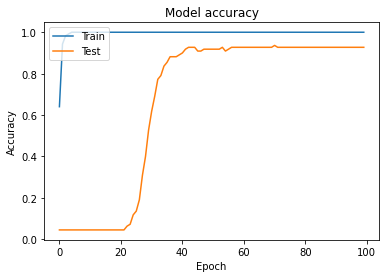

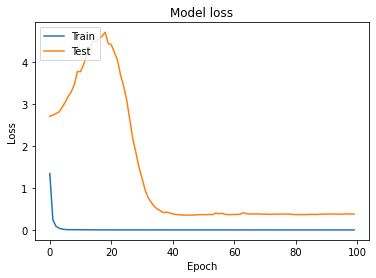

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
lb.classes_

array(['a', 'b', 'c', 'circle', 'd', 'down', 'e', 'five', 'four', 'left',
       'one', 'right', 'three', 'two', 'up'], dtype='<U6')

In [11]:
preds = cnn.predict(x_test_img)
class_index = preds.argmax(axis=-1)
preds_labels = []
for index in class_index:
    preds_labels.append(lb.classes_[index])

In [18]:
accuracy_score(lb.inverse_transform(y_test), preds_labels)

0.9272727272727272

In [19]:
cnn.save_weights('cnn_weights.h5')

In [24]:
import joblib
joblib.dump(lb, "labelbinarizer.joblib")

['labelbinarizer.joblib']